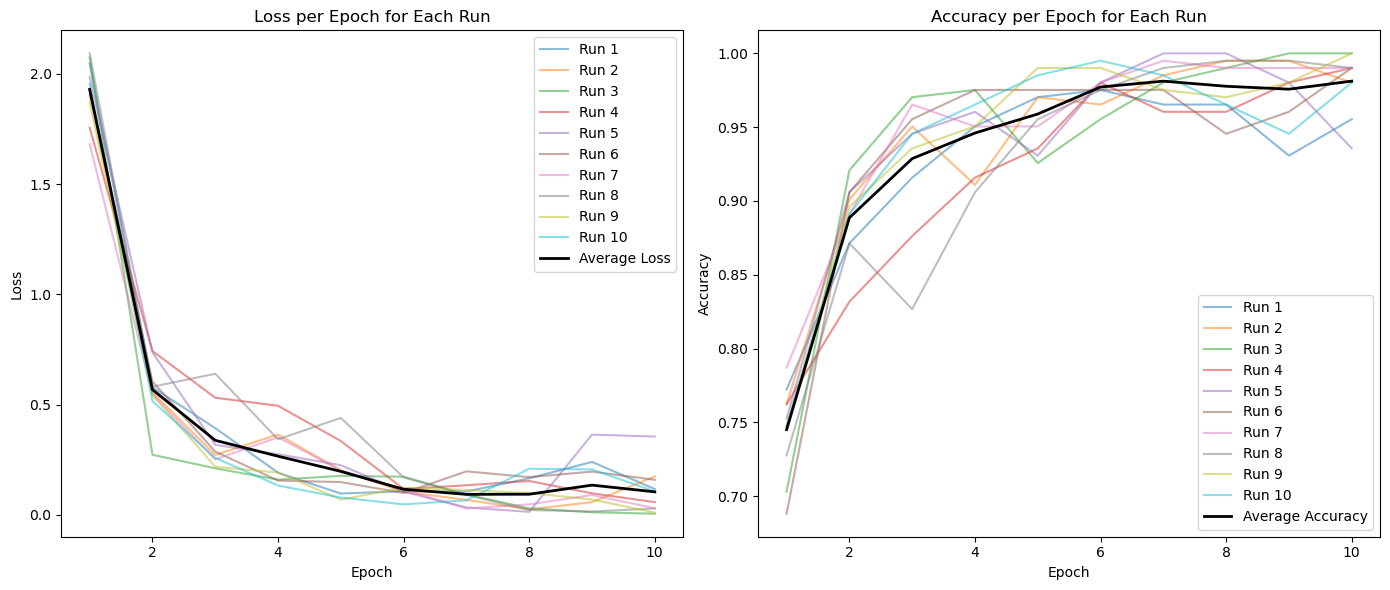

In [7]:
import matplotlib.pyplot as plt
import glob
import numpy as np

# Initialize lists to store the epoch-wise loss and accuracy for all runs
all_epochs_loss = []
all_epochs_accuracy = []

# Pattern to match all relevant .out files
file_pattern = 'slurm-*.out'

# Find all files matching the pattern
file_list = glob.glob(file_pattern)

# Loop through each file and extract loss and accuracy for each epoch
for file_path in file_list:
    epoch_loss = []
    epoch_accuracy = []
    with open(file_path, 'r') as file:
        for line in file:
            if "Loss =" in line:
                # Extract test loss and accuracy from the line
                parts = line.split()
                loss = float(parts[4][:-1])  # Remove the comma at the end
                accuracy = float(parts[7])
                epoch_loss.append(loss)
                epoch_accuracy.append(accuracy)
    all_epochs_loss.append(epoch_loss)
    all_epochs_accuracy.append(epoch_accuracy)

# Prepare for plotting each run separately
epochs = np.arange(1, len(all_epochs_loss[0]) + 1)

plt.figure(figsize=(14, 6))

# Plot loss for each run and the average loss
plt.subplot(1, 2, 1)
for i, run_loss in enumerate(all_epochs_loss):
    plt.plot(epochs, run_loss, label=f'Run {i+1}', alpha=0.5)  # Plot each run with lower opacity
# Calculate and plot the average loss
avg_loss_per_epoch = [np.mean([run_loss[i] for run_loss in all_epochs_loss]) for i in range(len(epochs))]
plt.plot(epochs, avg_loss_per_epoch, label='Average Loss', color='black', linewidth=2)
plt.title('Loss per Epoch for Each Run')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for each run and the average accuracy
plt.subplot(1, 2, 2)
for i, run_accuracy in enumerate(all_epochs_accuracy):
    plt.plot(epochs, run_accuracy, label=f'Run {i+1}', alpha=0.5)  # Plot each run with lower opacity
# Calculate and plot the average accuracy
avg_accuracy_per_epoch = [np.mean([run_accuracy[i] for run_accuracy in all_epochs_accuracy]) for i in range(len(epochs))]
plt.plot(epochs, avg_accuracy_per_epoch, label='Average Accuracy', color='black', linewidth=2)
plt.title('Accuracy per Epoch for Each Run')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Assuming avg_loss_per_epoch and avg_accuracy_per_epoch are defined as before
data = {
    'Epoch': epochs,
    'Average Loss': avg_loss_per_epoch,
    'Average Accuracy': avg_accuracy_per_epoch
}
df = pd.DataFrame(data)

print(df.to_string(index=False))


 Epoch  Average Loss  Average Accuracy
     1       1.92977           0.74505
     2       0.56816           0.88861
     3       0.33829           0.92868
     4       0.26637           0.94602
     5       0.19753           0.95889
     6       0.11648           0.97720
     7       0.09333           0.98116
     8       0.09402           0.97770
     9       0.13516           0.97573
    10       0.10472           0.98118
